In [10]:
%matplotlib inline
from IPython.display import display,Latex,Math,HTML,clear_output
import sympy as sym
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<center>
<hr>
<font size="20" color='Blue' >One Dimensional Unconstrained Optimization</font>
<hr>
</center>

In [18]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = 2 sin(x)-{{x^2 \\over 10}}
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

https://www.geodose.com/2021/06/golden-section-search-python-application-example.html

In [2]:
def func(x):
    return 2*np.sin(x) - x**2/10

In [3]:
def check_pos(x1,x2):
    if x2<x1:
        label='right'
    else:
        label=''
    return label

In [4]:
def update_interior(xl,xu):
    d=((np.sqrt(5)-1)/2)*(xu-xl)
    x1=xl+d
    x2=xu-d
    return x1,x2

In [5]:
def find_min(xl,xu,x1,x2,label):
    fx1=func(x1)
    fx2=func(x2)
    if fx2>fx1 and label=='right':
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    else:
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    return xl,xu,xopt

In [6]:
def find_max(xl,xu,x1,x2,label):
    fx1=func(x1)
    fx2=func(x2)
    if fx2>fx1 and label=='right':
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    else:
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    return xl,xu,xopt


In [14]:
#PLOTTING FUNCTION
def plot_graph(xl,xu,x1,x2):
    clear_output(wait=True)
    
    #plot sinus graph
    plt.plot(x,y)
    plt.plot([0,6],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,func(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,func(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,func(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,func(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,func(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,func(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,func(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,func(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    plt.ylim([-5,2])
    plt.show()

In [8]:

def golden_search(xl,xu,mode,et):
    it=0
    e=1
    while e>=et:
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        fx1=func(x1)
        fx2=func(x2)
        label=check_pos(x1,x2)
        clear_output(wait=True)
        plot_graph(xl,xu,x1,x2) #PLOTTING
        plt.show()
        
        #SELECTING AND UPDATING BOUNDARY-INTERIOR POINTS
        if mode=='max':
            new_boundary=find_max(xl,xu,x1,x2,label)
        elif mode=='min':
            new_boundary=find_min(xl,xu,x1,x2,label)
        else:
            print('Please define min/max mode')
            break #exit if mode not min or max
        xl=new_boundary[0]
        xu=new_boundary[1]
        xopt=new_boundary[2]
        
        it+=1
        print ('Iteration: ',it)
        r=(np.sqrt(5)-1)/2 #GOLDEN RATIO
        e=((1-r)*(abs((xu-xl)/xopt)))*100 #Error
        print('Error:',e)
        time.sleep(1)

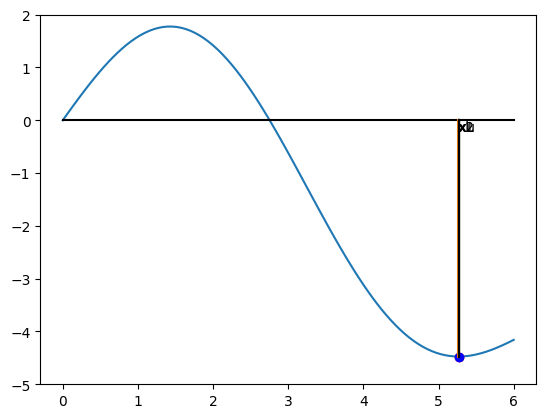

Iteration:  15
Error: 0.03190947289444476


In [17]:
x=np.linspace(0,6,100)
y=func(x)

#EXECUTING GOLDEN SEARCH FUNCTION
golden_search(0,6,'max',0.05)

<center>
<hr>
<font size="20" color='Blue' >Newton's Method</font>
<hr>
</center>

In [19]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = 2 sin(x)-{{x^2 \\over 10}}
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

In [20]:
def func(x):
    return 2*np.sin(x) - x**2/10

def dfunc(x):
    return 2*np.cos(x) - x/5

def ddfunc(x):
    return -2*np.sin(x) - 1/5

In [ ]:
def plot_graph(x1):
    clear_output(wait=True)
    
    #plot sinus graph
    plt.plot(x,y)
    plt.plot([0,6],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,func(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,func(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,func(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,func(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,func(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,func(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,func(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,func(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    plt.ylim([-5,2])
    plt.show()

In [21]:
xx = [2.5]
x0 = xx[0]
x=np.linspace(0,6,100)
y=func(x)
for i in range(0,10):
    x1 = x0 - dfunc(x0)/ddfunc(x0)
    plot_graph(x1)
    plt.show()
    print(f"{i+1:2} : x0 = {x0:0.5f}, x1 = {x1:.5f}  f(x) = {func(x1):.4e}")
    x0 = x1
    xx.append(x1)

 1 : x0 = 2.50000, x1 = 0.99508  f(x) = 1.5786e+00
 2 : x0 = 0.99508, x1 = 1.46901  f(x) = 1.7738e+00
 3 : x0 = 1.46901, x1 = 1.42764  f(x) = 1.7757e+00
 4 : x0 = 1.42764, x1 = 1.42755  f(x) = 1.7757e+00
 5 : x0 = 1.42755, x1 = 1.42755  f(x) = 1.7757e+00
 6 : x0 = 1.42755, x1 = 1.42755  f(x) = 1.7757e+00
 7 : x0 = 1.42755, x1 = 1.42755  f(x) = 1.7757e+00
 8 : x0 = 1.42755, x1 = 1.42755  f(x) = 1.7757e+00
 9 : x0 = 1.42755, x1 = 1.42755  f(x) = 1.7757e+00
10 : x0 = 1.42755, x1 = 1.42755  f(x) = 1.7757e+00


In [ ]:
for x in xx: print(f"{x:0.5f}")

In [ ]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
# ax.set_aspect('equal')
ax.figure.set_figheight(8)
ax.figure.set_figwidth(20)
ax.hlines(0, -0.1, 0.2, colors='k', linestyles='solid')
ax.vlines(0, -0.003, 0.007, colors='k', linestyles='solid')
# ax.vlines(0.02, -0.003, 0.007, colors='r', linestyles='dashed')
ax.set_ylim(-0.0003, 0.0004)
ax.set_xlim(-0.02, 0.12)
x = [i/1000.0-0.1 for i in range(0, 300)]
y = [func(i) for i in x]
line, = ax.plot(x, y)

In [ ]:
def update(frame):
    ax.vlines(xx[frame], -0.0003, 0.0004, colors='r', linestyles='dashed')
    
    ball.center = (xx[frame], 0)
    ax.scatter(xx[frame], [0], color='b')
    # ax.add_patch(ball)

anim = animation.FuncAnimation(fig, update, frames=range(0, len(xx)), interval=1000, repeat=False)
HTML(anim.to_jshtml())
# plt.show()

In [ ]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = x^3-0.03x^2+2.4 \\times 10^{{-6}}=0
      \\end{{equation*}} 
      """)

In [ ]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
# ax.set_aspect('equal')
ax.figure.set_figheight(8)
ax.figure.set_figwidth(20)
ax.hlines(0, -0.1, 0.2, colors='k', linestyles='solid')
ax.vlines(0, -0.003, 0.007, colors='k', linestyles='solid')
ax.vlines(0.02, -0.003, 0.007, colors='r', linestyles='dashed')
ax.set_ylim(-0.00001, 0.00001)
ax.set_xlim(-0.05, 0.05)
x = [i/1000.0-0.1 for i in range(0, 300)]
y = [i**3-0.03*i**2+2.4*10**-6 for i in x]
line, = ax.plot(x, y)

<center>
<hr>
<font size="20" color='Blue' >Secant Method</font>
<hr>
</center>

In [ ]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = x^3-0.165x^2+3.993 \\times 10^{{-4}}=0
      \\end{{equation*}} 
      """)

In [ ]:
def func(x):
    return x**3 - 0.165*x**2 + 3.993*10**-4


In [ ]:
xx = [0.02, 0.05]
x0,x1 = xx[0],xx[1]
for i in range(0,10):
    if abs(func(x0) - func(x1)) < 1e-14: 
        break
    x = x0 - func(x0)*(x0-x1)/(func(x0) - func(x1))
    print(f"{i+1:2} : x0 = {x0:0.5f}, x1 = {x1:.5f}  f(x) = {func(x):.4e}")
    x0 = x1
    x1 = x
    xx.append(x)

<center>
<hr>
<font size="20" color='Blue' >The end...</font>
<hr>
</center>